In [1]:
import datetime
import yaml
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

C:\Users\14425\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
filename = 'test_CNN_dis_LSTM_gen.npy'

In [3]:
X = np.load(filename, mmap_mode='r')

In [4]:
X.shape

(4, 30, 1)

In [5]:
data = pd.DataFrame(X.reshape(4,30).T)

In [6]:
data

,0,1,2,3
0,33.636448,33.669937,33.188389,33.578846
1,33.354332,33.280273,33.330151,33.393620
2,33.183342,32.977802,32.877930,33.068306
3,33.253914,33.020981,33.273598,32.863155
4,33.085606,32.889305,32.742943,32.652248
5,33.180267,32.660683,32.997162,32.583004
6,33.184273,32.859131,32.712032,32.163605
7,33.146717,32.643913,32.896790,32.206741
8,33.249756,32.902130,32.867229,32.289738
9,33.470879,33.236458,32.800949,32.349098


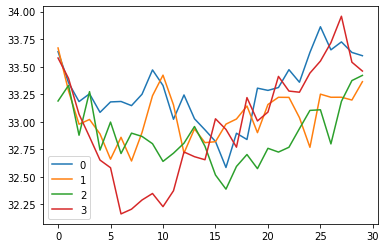

In [7]:
p = data.plot.line()